# Credit Card Offer Acceptance

---

## Introduction

### Project Overview
This project involves analyzing credit card offer acceptance data to predict customer likelihood of signing up for a credit card. By leveraging data on customer characteristics, the goal is to enhance targeted marketing strategies and identify the most compelling offers for different customer segments.

### Background
The dataset used in this project comprises detailed information on customers and credit card offers. It includes data on customer demographics, such as income and credit rating, as well as specifics of the credit card offers, including reward types. This dataset is instrumental in understanding the factors that influence the acceptance rate of credit card offers. By analyzing these variables, we aim to uncover patterns and insights that drive customer decisions, ultimately improving the effectiveness of targeted marketing strategies.

### Objectives
- **Customer Segmentation:** Classify customer profiles into distinct segments based on demographic and behavioral characteristics to better understand different customer groups.
- **Impact Analysis:** Identify and evaluate the key factors that significantly influence a customer's decision to accept or decline a credit card offer.
- **Predictive Modeling:** Develop a predictive model to forecast the likelihood of a customer accepting a credit card offer based on their individual characteristics.

### Data Description
#### Dataset Overview
The dataset used in this project is sourced from Data world's Credit Card Dataset. It includes 18,000 customer records and 18 features.
#### Key Features
- Customer Number: Unique identifier for each customer.
- Offer Accepted: Indicator of whether the customer accepted the credit card offer. (Boolean)
- Reward: Type of reward associated with the credit card.
- Mailer Type: Method used to deliver the credit card offer.
- Income Level: The customer’s income level.
- Number of Bank Accounts Open: Count of bank accounts held by the customer.
- Overdraft Protection: Indicator of whether the customer has overdraft protection on their accounts. (Boolean)
- Credit Rating: Rating reflecting the customer’s creditworthiness, based on payment history and ability to repay debt.
- Number of Credit Cards Held: Number of credit cards currently held by the customer.
- Number of Homes Owned: Number of homes owned by the customer.
- Household Size: Size of the customer’s household.
- Own Your Home?: Indicator of whether the customer owns their home. (Boolean)
- Average Balance: Average balance across all accounts.
- Q1 Balance: Balance of the customer’s accounts for the first quarter of the year.
- Q2 Balance: Balance of the customer’s accounts for the second quarter of the year. 
- Q3 Balance: Balance of the customer’s accounts for the third quarter of the year. 
- Q4 Balance: Balance of the customer’s accounts for the fourth quarter of the year. 
#### Data Types
- Categorical: Offer Accepted, Mailer Type, Income Level
- Numerical: Number of Bank Accounts Open, Overdraft Protection, Credit Rating, Number of Credit Cards Held, Number of Homes Owned, Household Size, Own Your Home?, Average Balance, Q1 Balance, Q2 Balance, Q3 Balance, Q4 Balance

### Prediction
The goal is to predict whether a customer will accept a credit card offer based on their characteristics. The prediction model will analyze various customer attributes to determine the likelihood of acceptance.

### Metric
**F1 Score:** The F1 Score is the harmonic mean of precision and recall, providing a balanced measure of a model's performance in classification tasks. It is particularly useful when dealing with imbalanced datasets, where achieving a balance between precision (the accuracy of positive predictions) and recall (the ability to identify all relevant instances) is crucial.

The F1 Score is calculated as follows:
$$
F1 = 2 \times \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}}
$$

This metric ensures that both false positives and false negatives are considered, offering a comprehensive assessment of the model's accuracy.

### References
1. Dataset Source: [Data World Credit Card Dataset](https://data.world/gautam2510/credit-card-dataset)

---

## Exploratory Data Analysis

### Understanding the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,index,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 18000 non-null  int64  
 1   Customer Number       18000 non-null  int64  
 2   Offer Accepted        18000 non-null  object 
 3   Reward                18000 non-null  object 
 4   Mailer Type           18000 non-null  object 
 5   Income Level          18000 non-null  object 
 6   # Bank Accounts Open  18000 non-null  int64  
 7   Overdraft Protection  18000 non-null  object 
 8   Credit Rating         18000 non-null  object 
 9   # Credit Cards Held   18000 non-null  int64  
 10  # Homes Owned         18000 non-null  int64  
 11  Household Size        18000 non-null  int64  
 12  Own Your Home         18000 non-null  object 
 13  Average Balance       17976 non-null  float64
 14  Q1 Balance            17976 non-null  float64
 15  Q2 Balance         

In [5]:
data.describe()

,index,Customer Number,# Bank Accounts Open,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,8999.500000,9000.500000,1.255778,1.903500,1.203444,3.499056,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,5196.296758,0.472501,0.797009,0.427341,1.114182,350.297837,620.077060,457.402268,553.452599,559.001365
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4499.750000,4500.750000,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,8999.500000,9000.500000,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,13499.250000,13500.250000,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,17999.000000,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


/home/hpark/Syncthing/Professional/DS_Projects/Credit_Card_Offer_Acceptance/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)



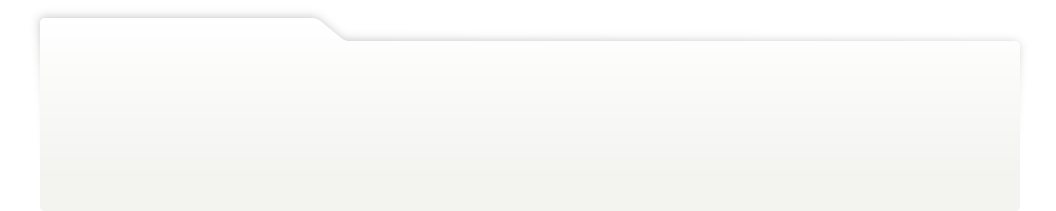
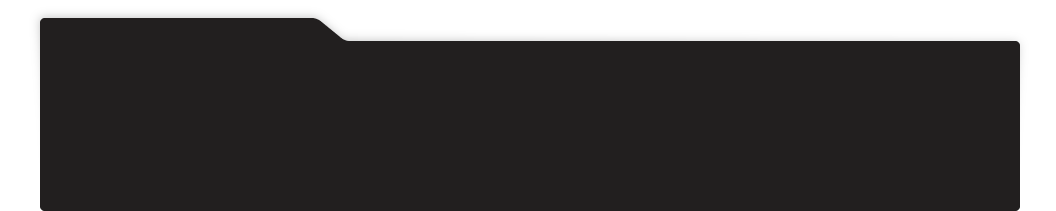
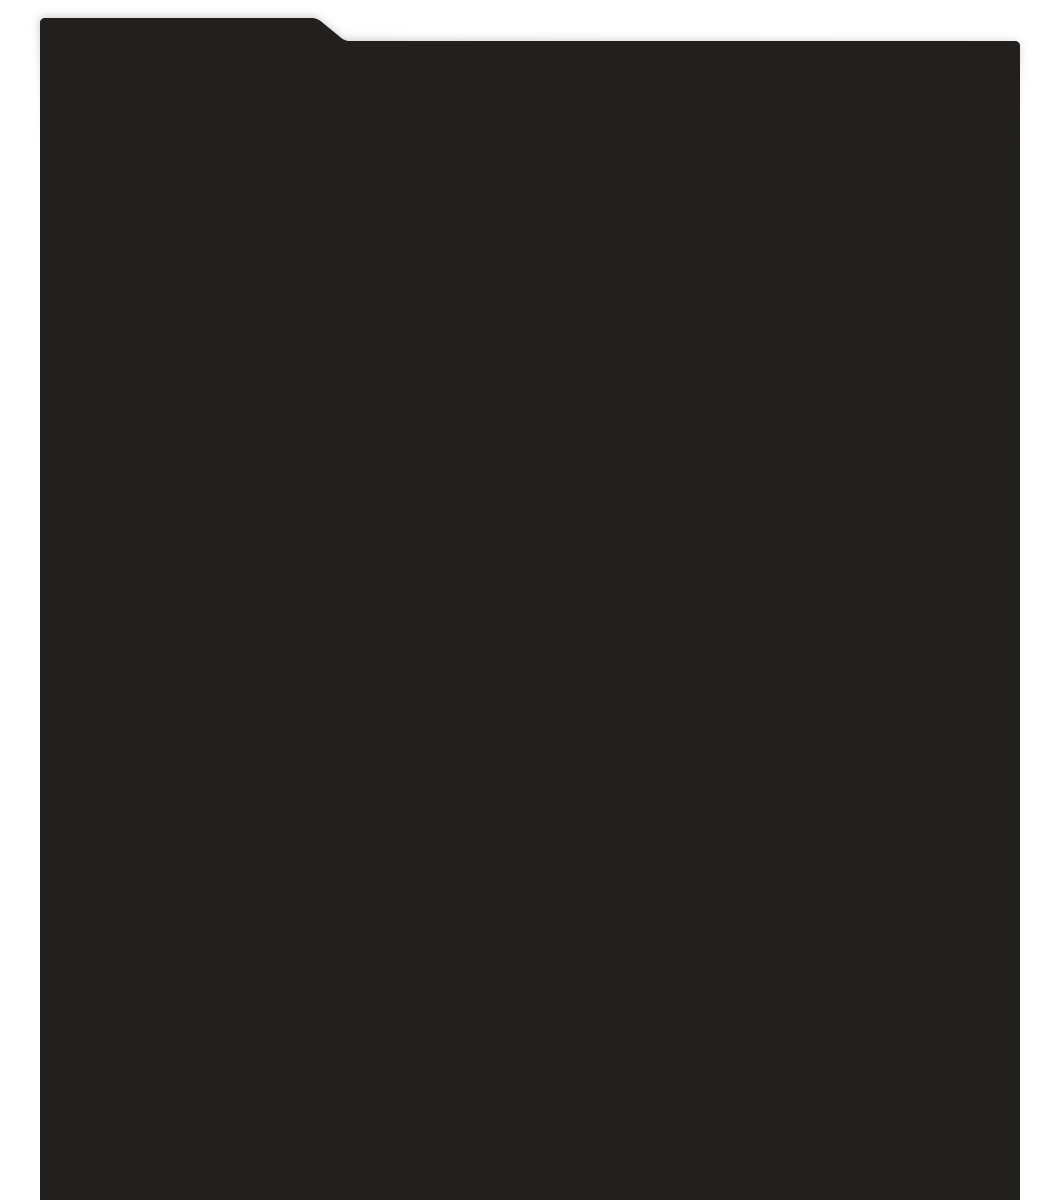
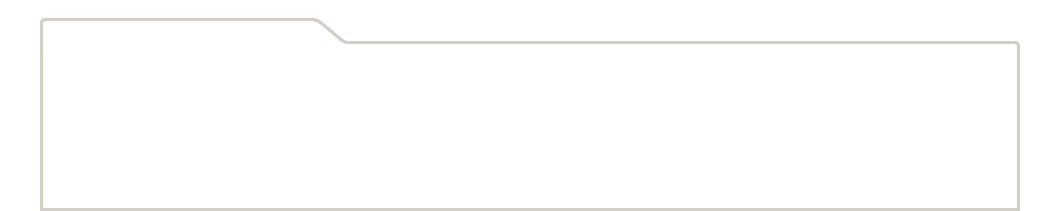
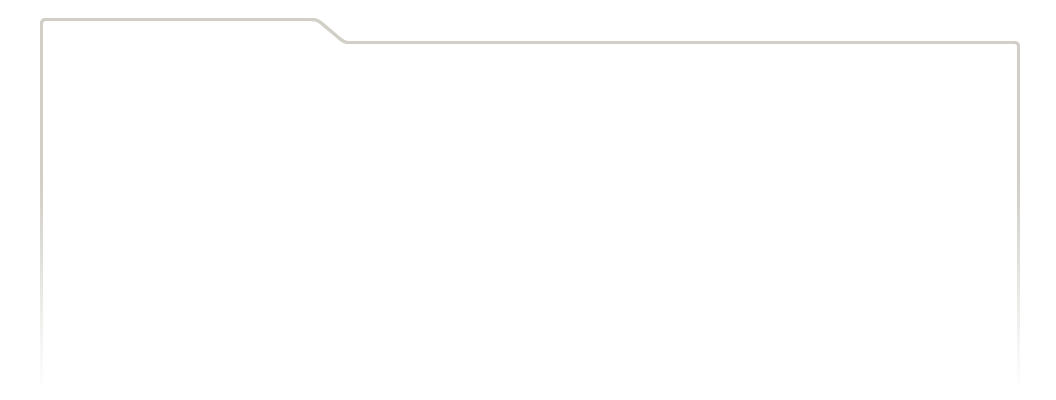
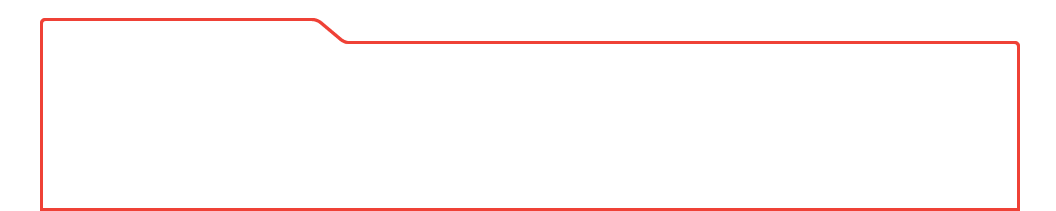
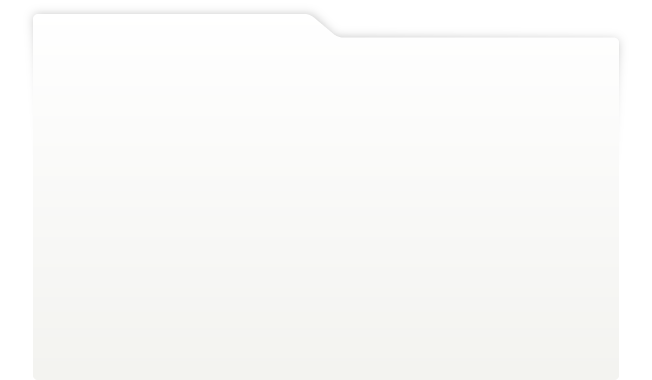
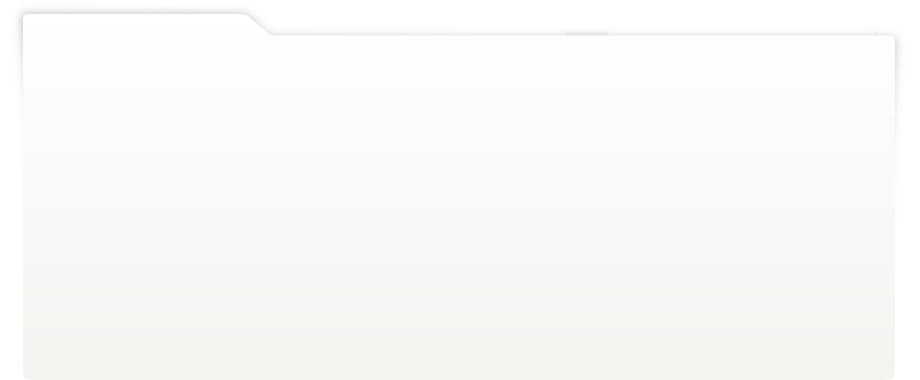
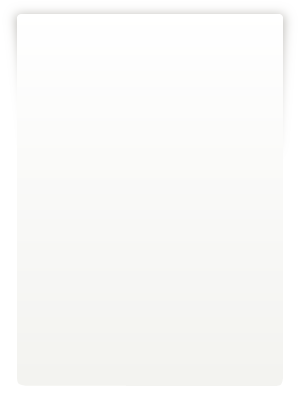
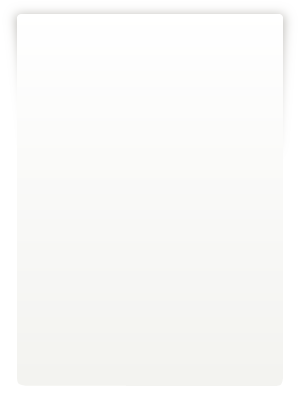
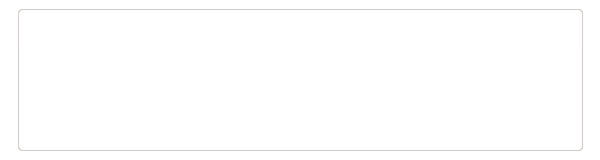
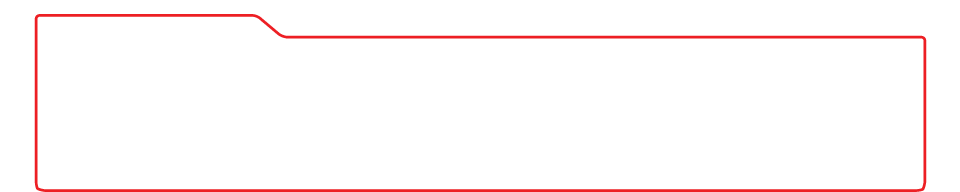
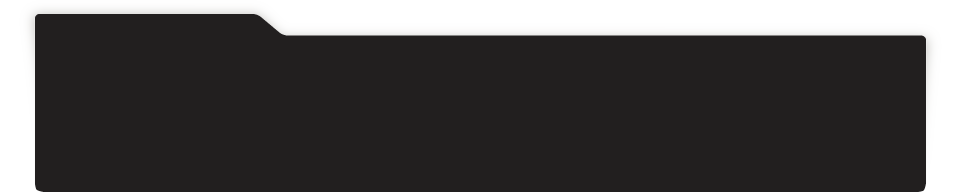
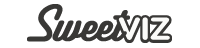
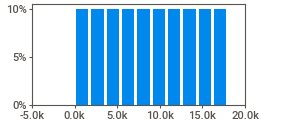
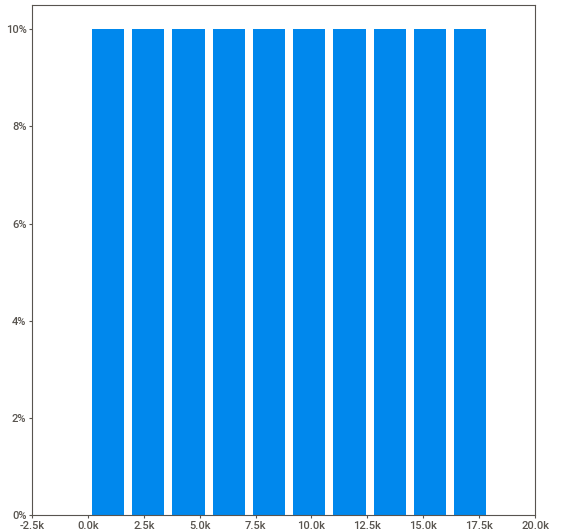
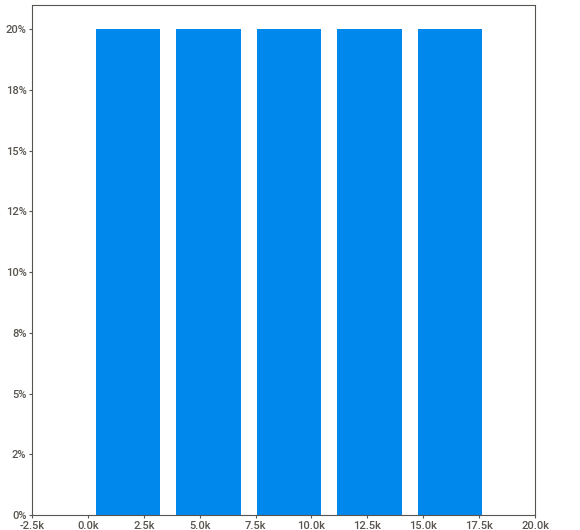
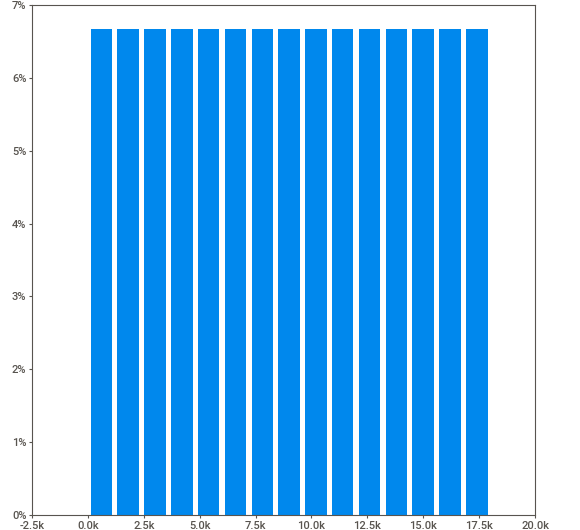
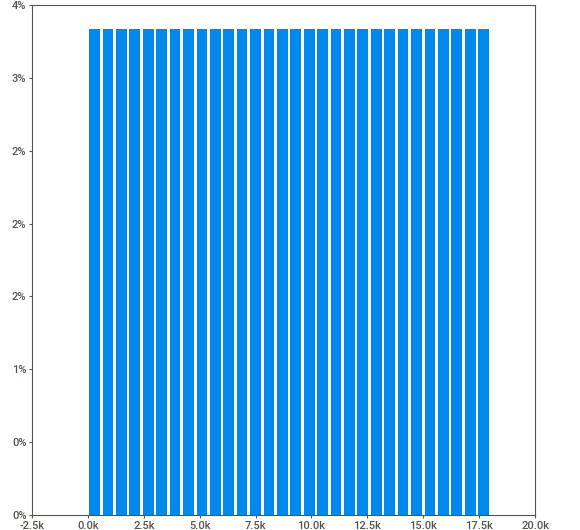
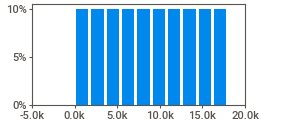
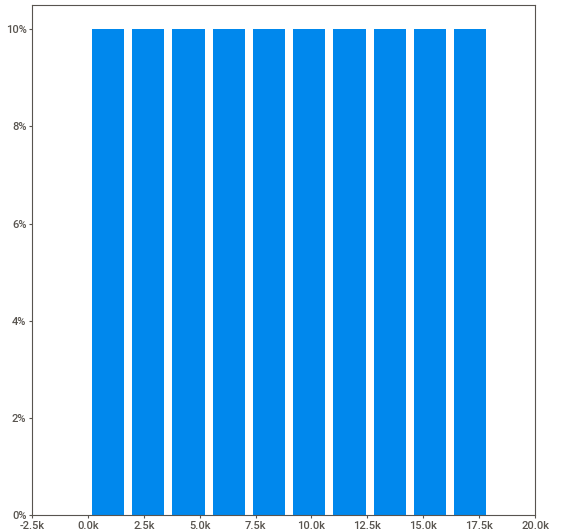
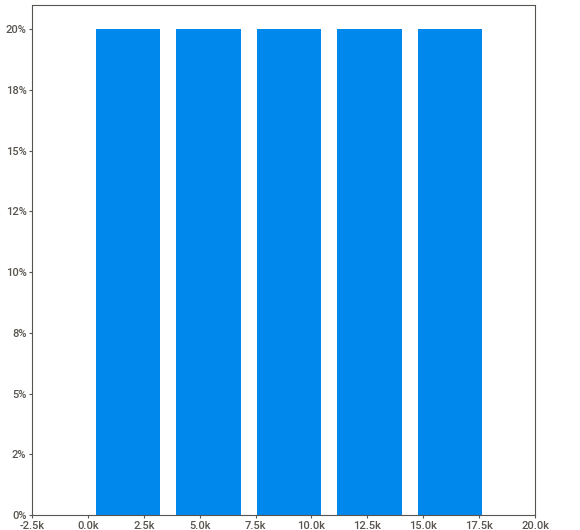
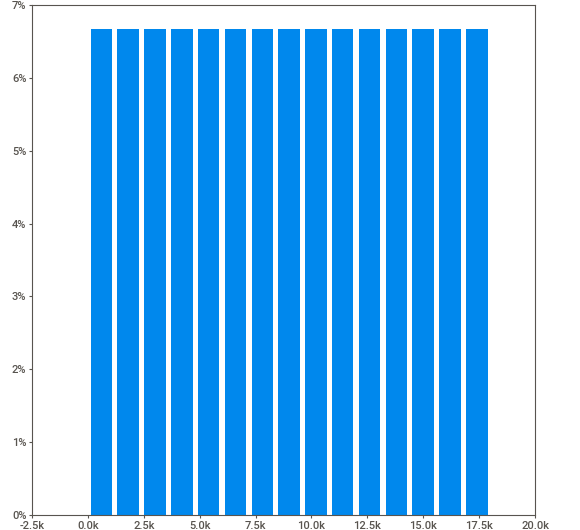
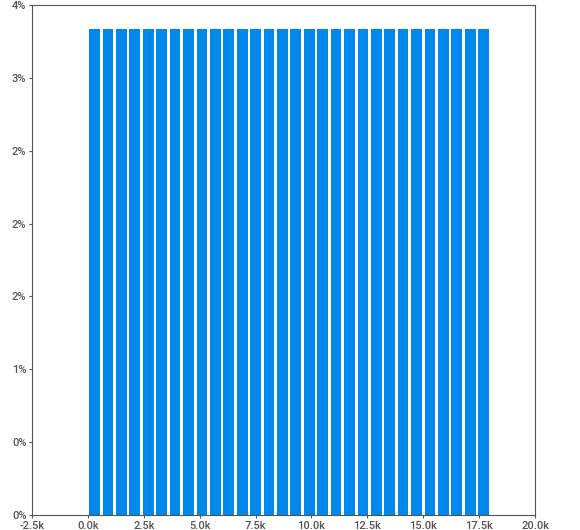
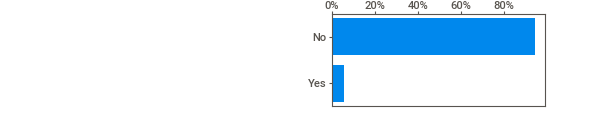
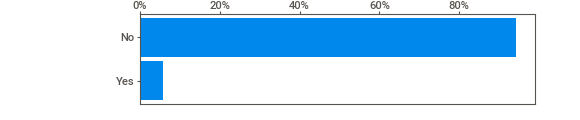
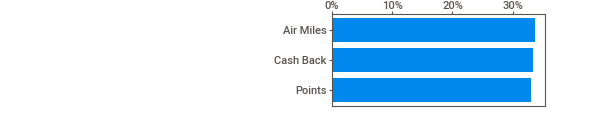
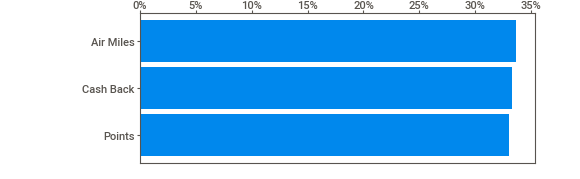
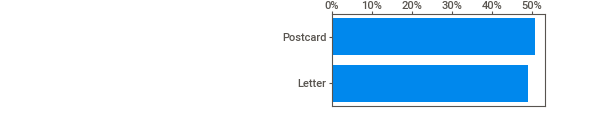
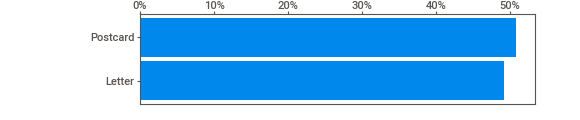
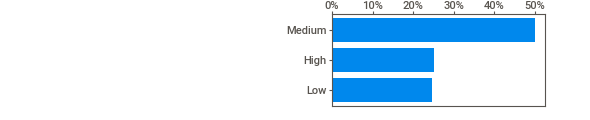
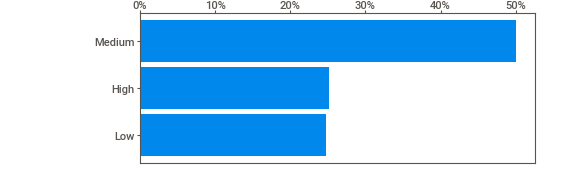
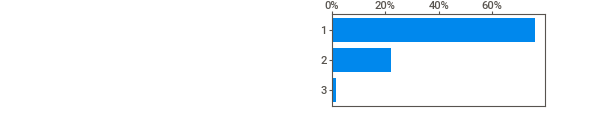
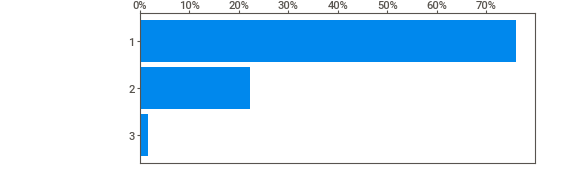
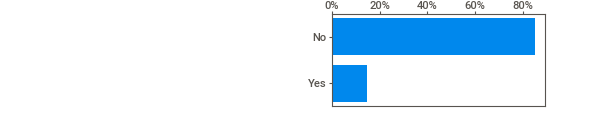
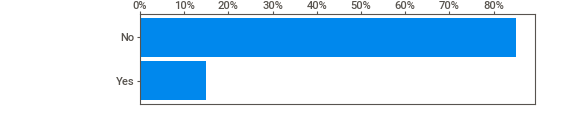
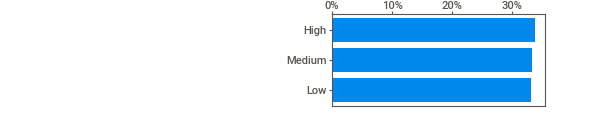
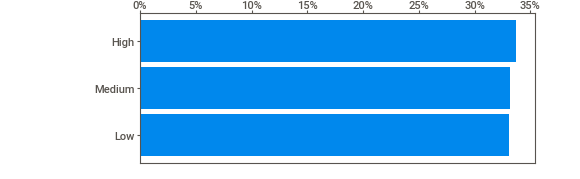
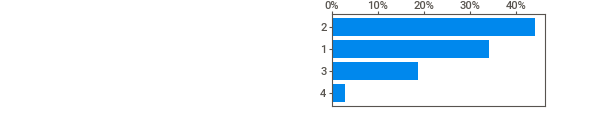
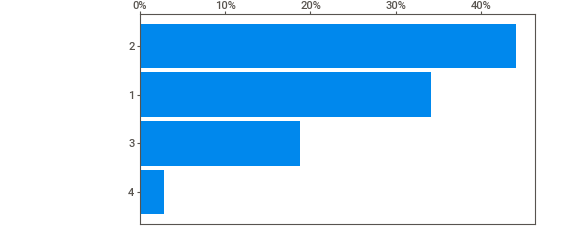
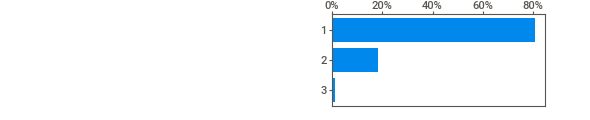
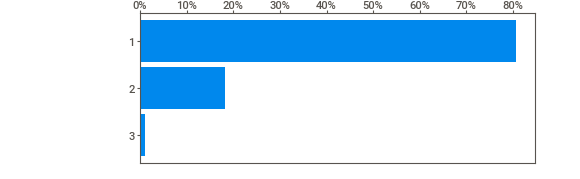
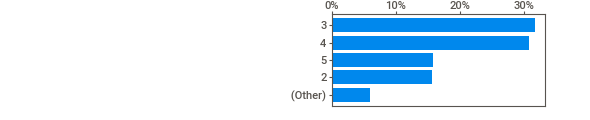
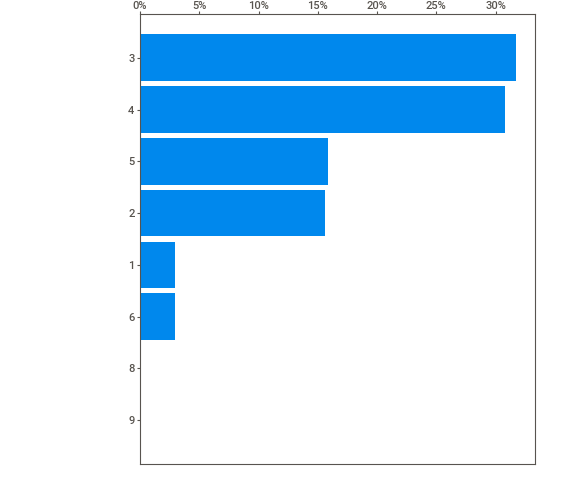
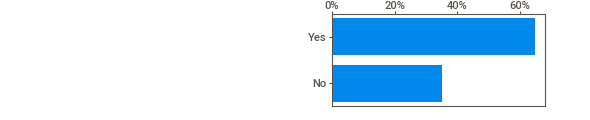
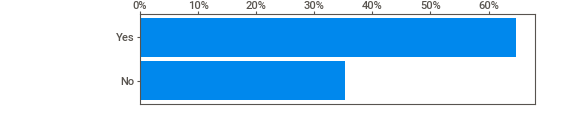
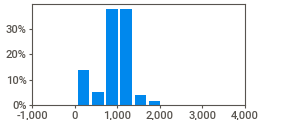
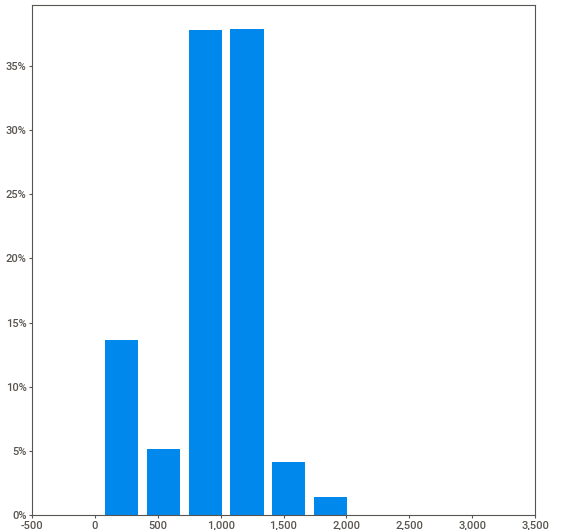
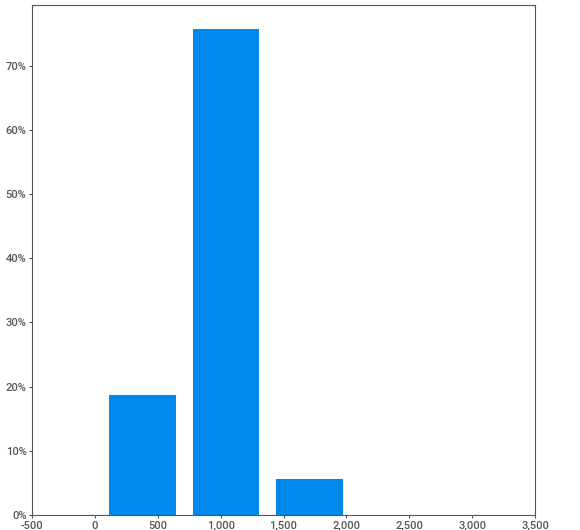
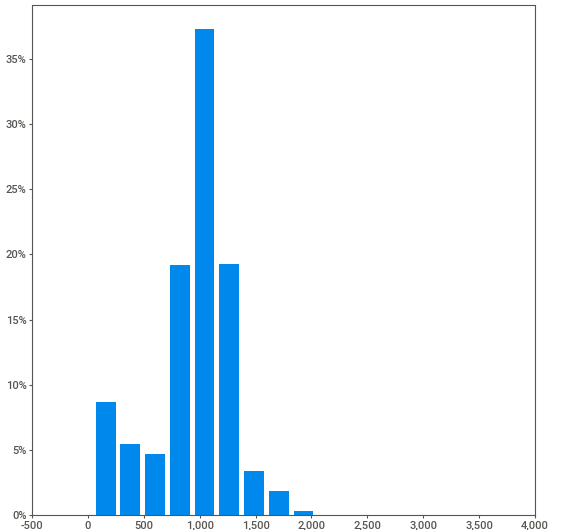
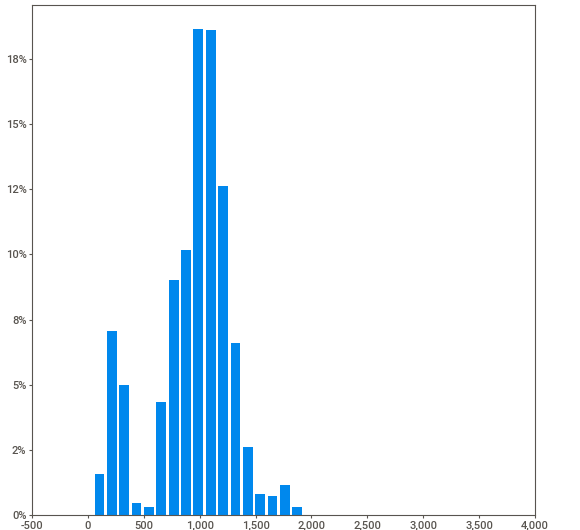
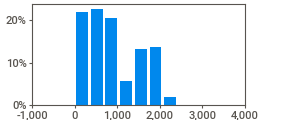
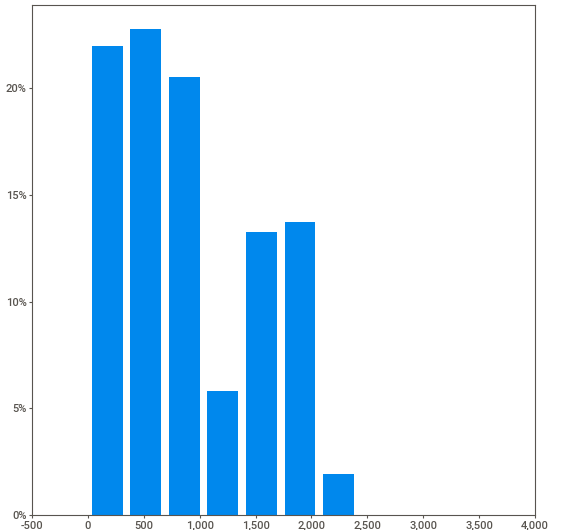
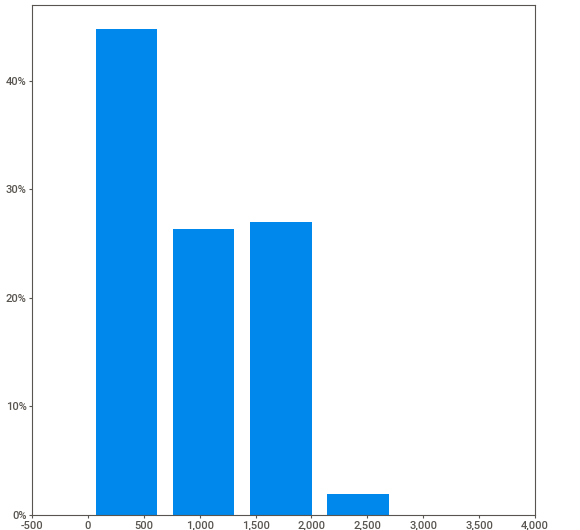
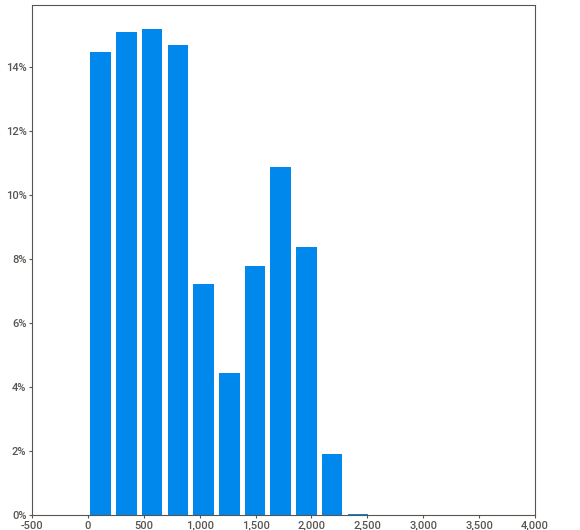
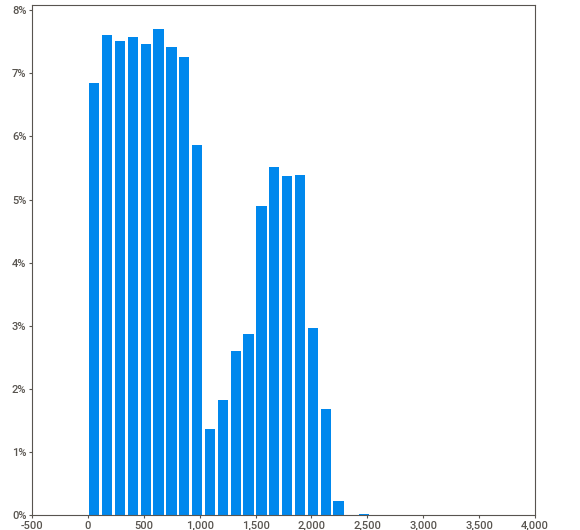
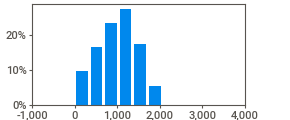
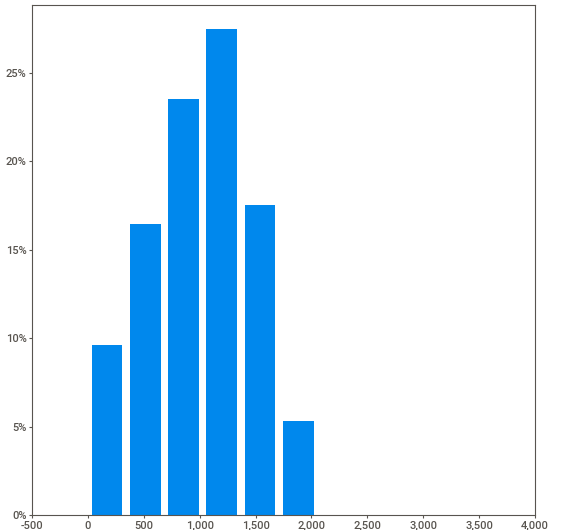
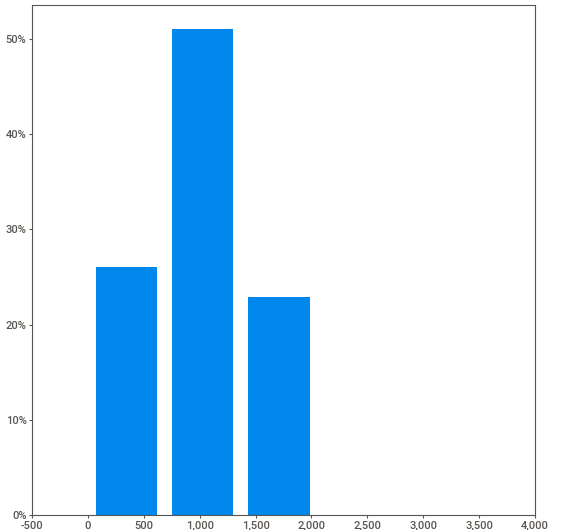
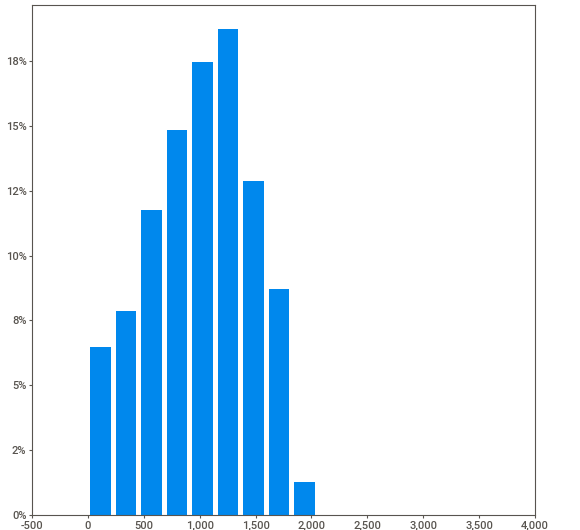
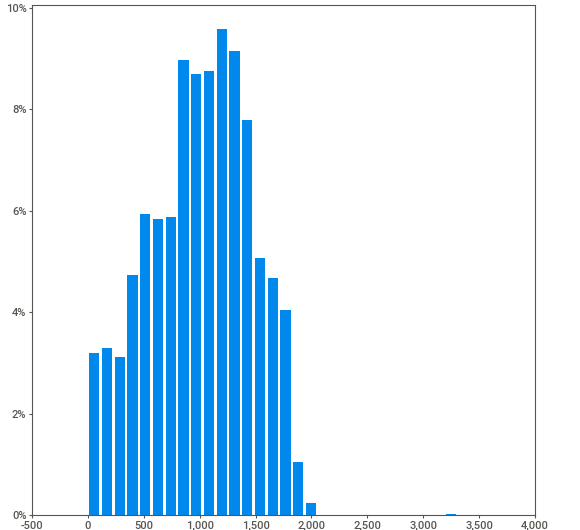
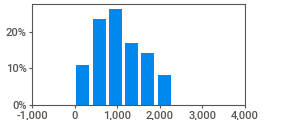
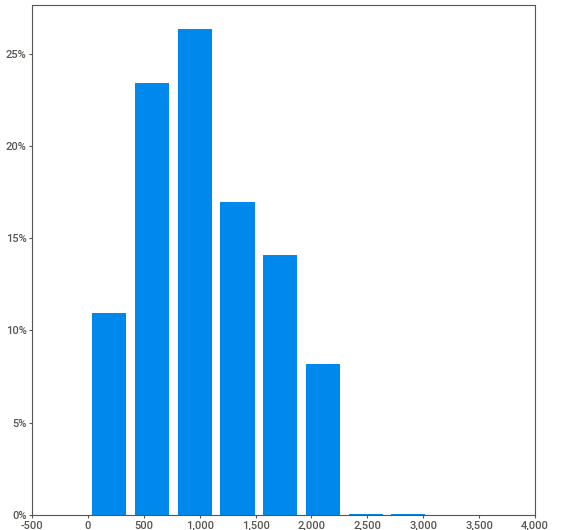
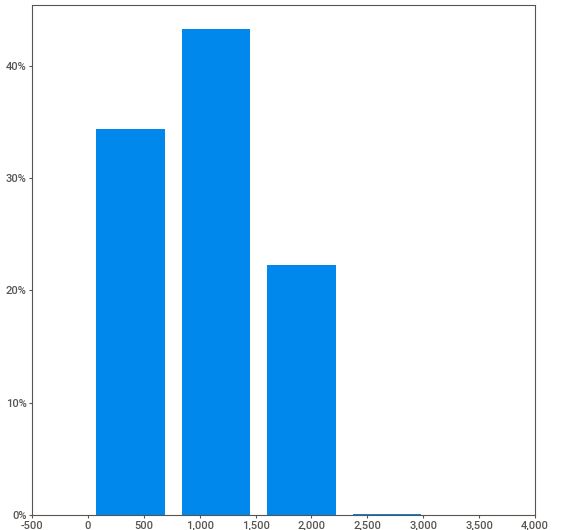
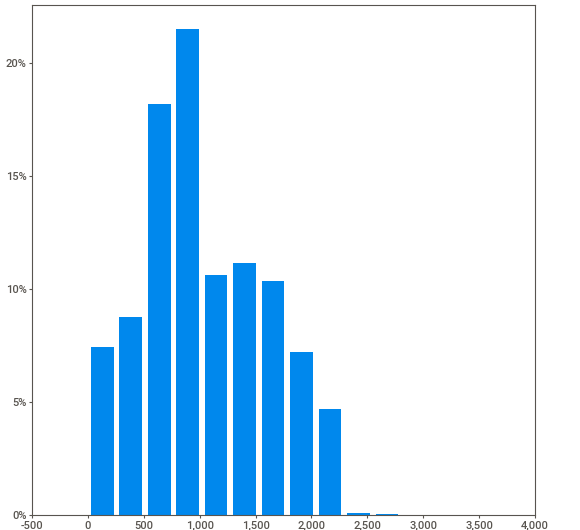
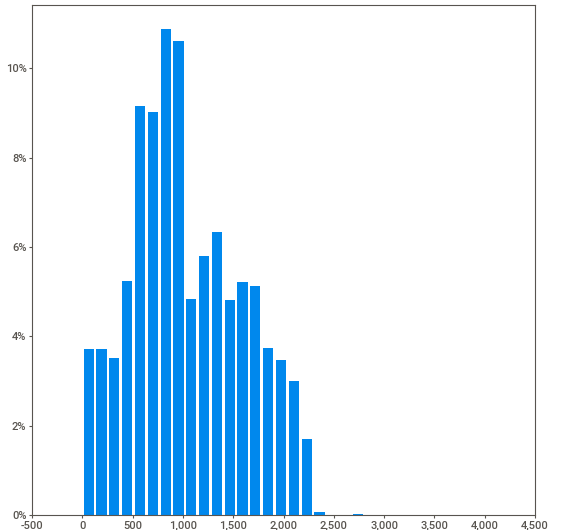
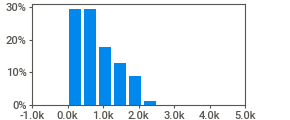
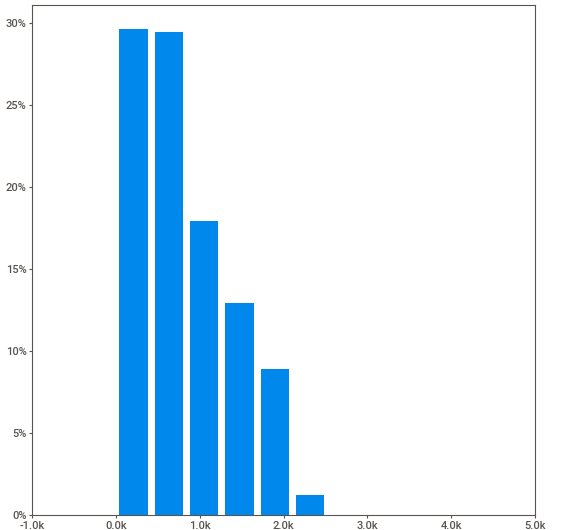
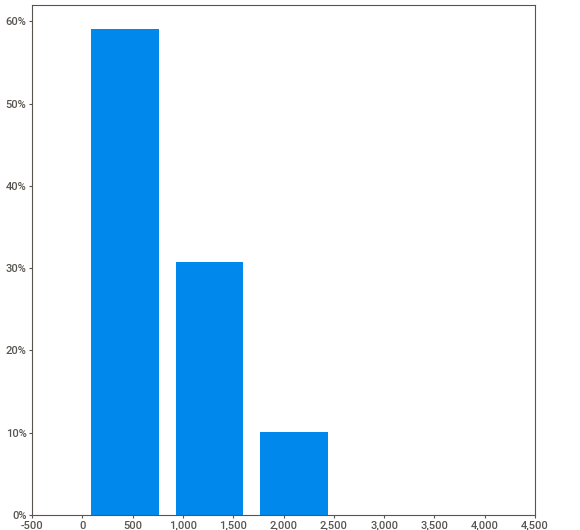
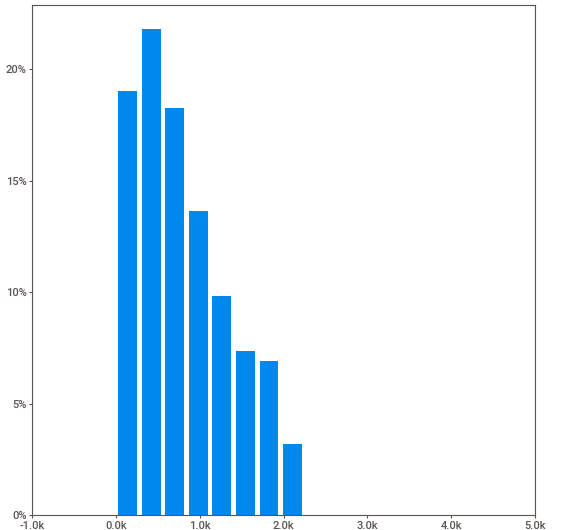
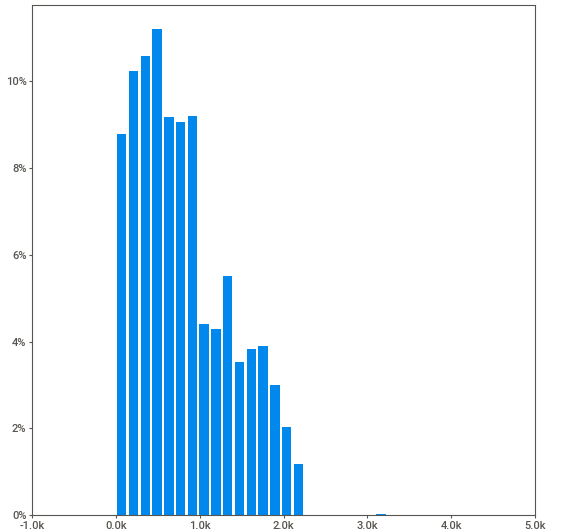
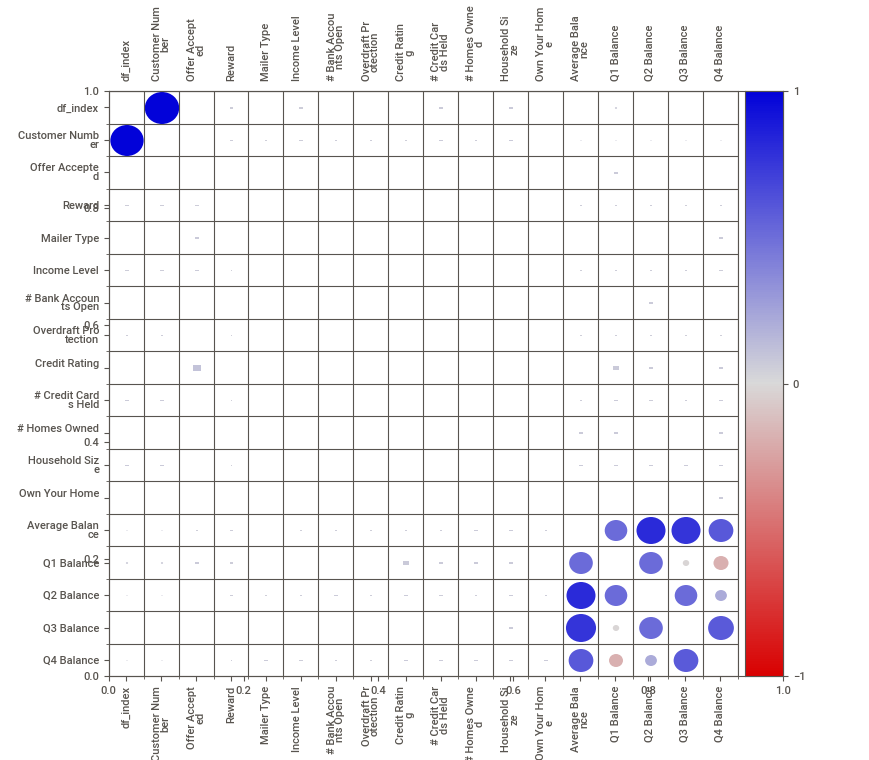
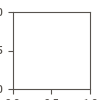

In [6]:
import sweetviz as sv

# Create a Sweetviz report
report = sv.analyze(data)

# Display the report in a Jupyter notebook
report.show_notebook()

In [7]:
numerical_columns = ['# Bank Accounts Open', '# Credit Cards Held', '# Homes Owned', 'Household Size', 'Average Balance', 'Q1 Balance', 'Q2 Balance', 'Q3 Balance', 'Q4 Balance'] # 9
categorical_columns = ['Offer Accepted', 'Reward', 'Mailer Type', 'Income Level', 'Overdraft Protection', 'Credit Rating', 'Own Your Home'] # 7

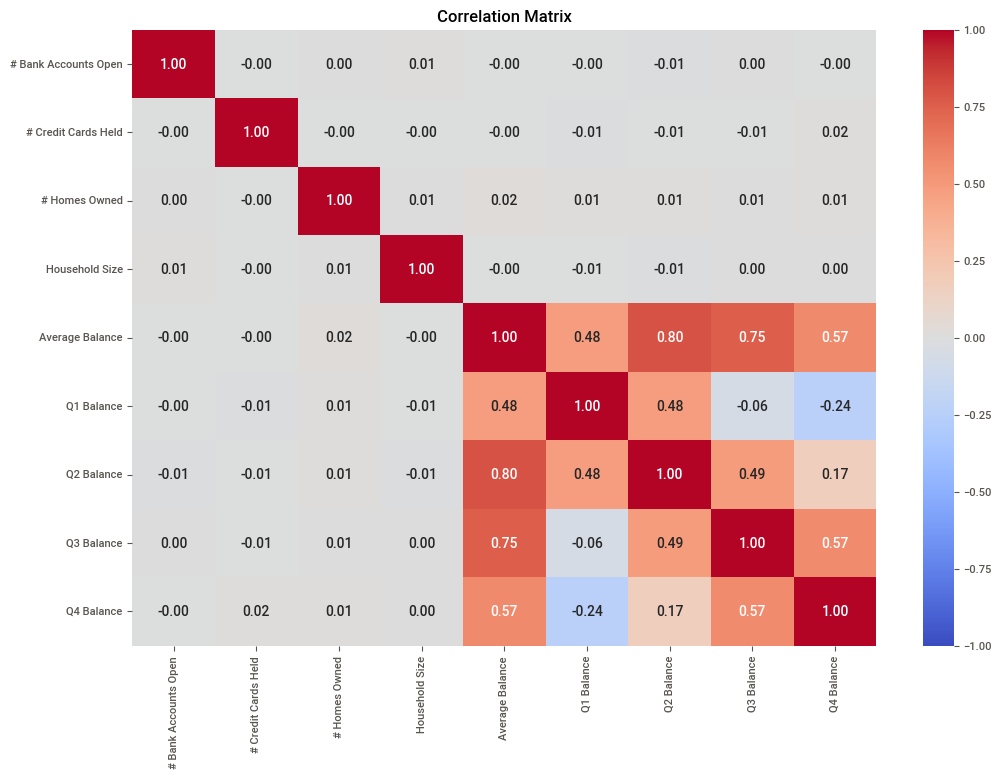

In [8]:
# Compute the correlation matrix
corr_matrix = data[numerical_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [11]:
minority_class = data[data['Offer Accepted'] == 'Yes']
majority_class = data[data['Offer Accepted'] == 'No']

majority_class_sampled = majority_class.sample(n=len(minority_class), random_state=42)

balanced_data = pd.concat([minority_class, majority_class_sampled])

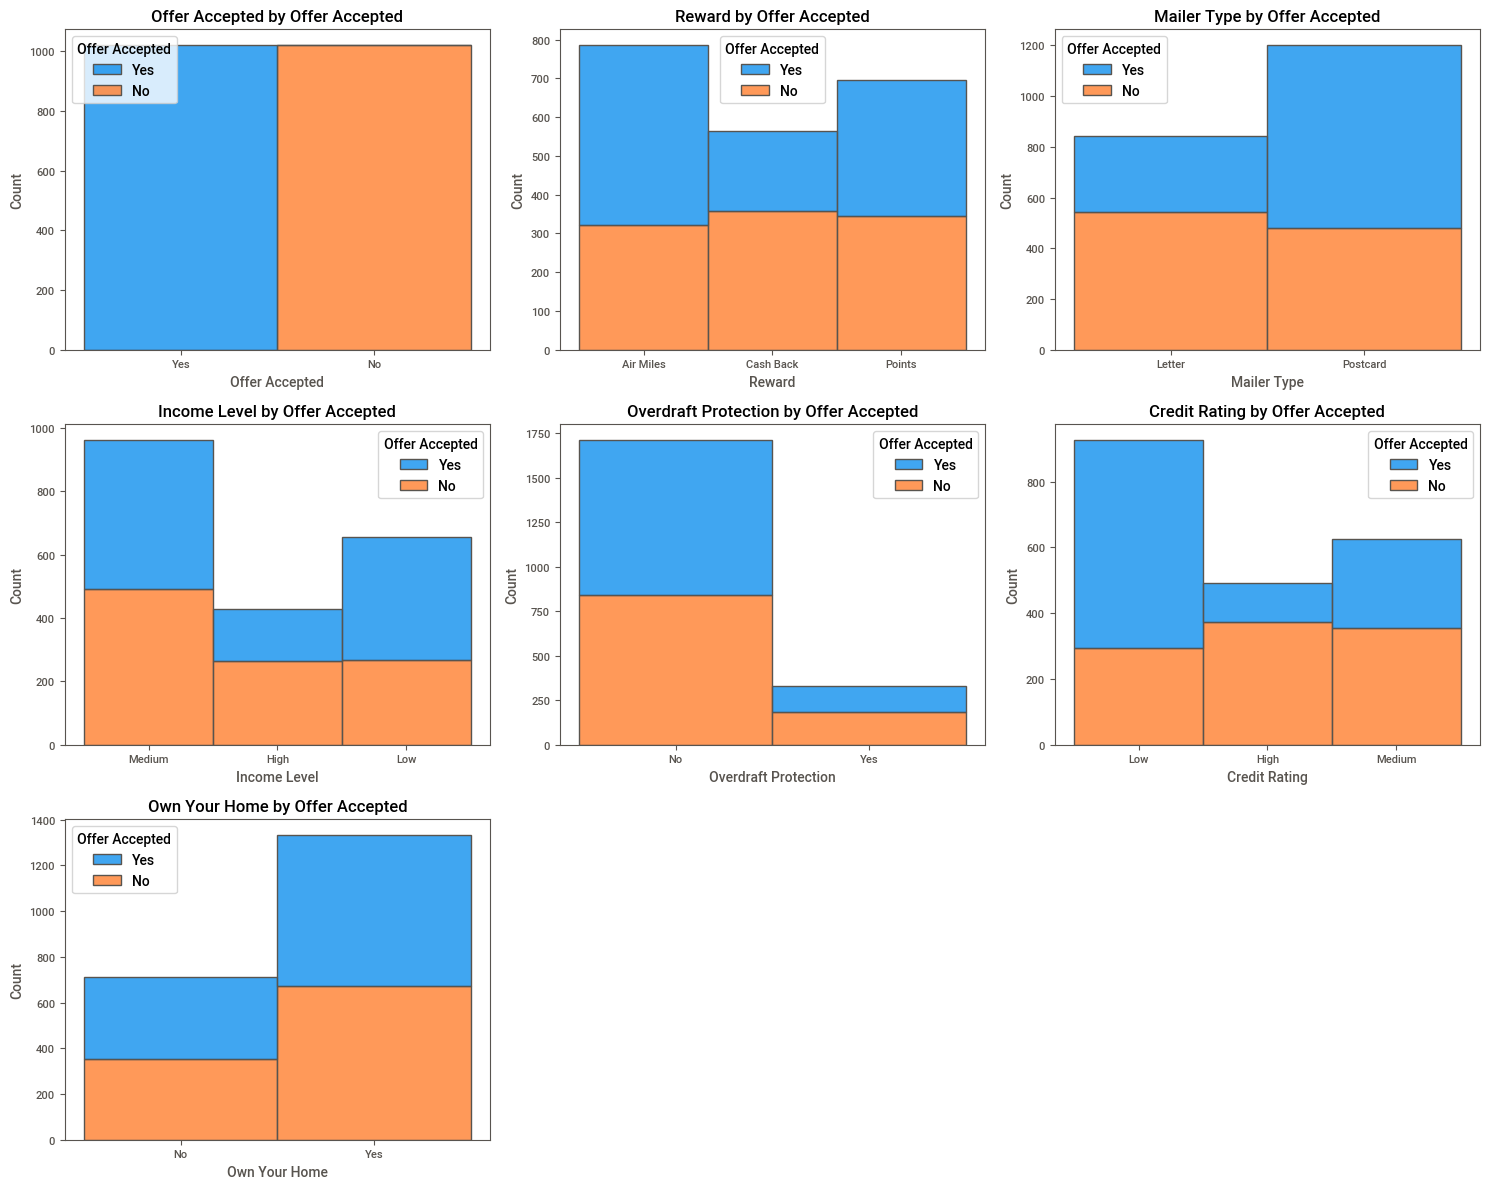

In [12]:
# Determine the number of rows and columns for subplots
num_plots = len(categorical_columns)
cols = 3  # Number of columns in the grid
rows = np.ceil(num_plots / cols).astype(int)  # Number of rows in the grid

# Create a figure with a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

# Loop through the columns and plot each one
for i, column in enumerate(categorical_columns):
    sns.histplot(data=balanced_data, x=column, hue='Offer Accepted', multiple='stack', ax=axes[i])
    axes[i].set_title(f'{column} by Offer Accepted')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Display the plots
plt.tight_layout()
plt.show()